# Demo of endpoint donor_grouping (part 1)

Documentation: http://gmql.eu/popstudy/api/ui/#/default/server.api.donor_grouping

Requirements to run this demo: https://github.com/DEIB-GECO/VarSum/blob/master/demo/README_requirements

Try this demo online: https://colab.research.google.com/drive/1Mutc71GeMPNtLRO3HlUyccY1-X4q7tel

In this example we are going to see how to query and use the API in order to find the distribution of the healthy individuals from South Asia, according to their gender and origin. 

In order to make such request, we need to prepare the appropriate parameters like below:

In [1]:
import json
param = {
    'group_by': [
        'gender',
        'population'
    ],
    'having_meta': {
        'healthy': true,
        'super_population': ['SAS'],
        'assembly': 'hg19'
    }
}
body = json.dumps(param)
print(body)

{"group_by": ["gender", "population"], "having_meta": {"health_status": "true", "super_population": ["SAS"], "assembly": "hg19"}}


POST the endpoint \donor_grouping with the prepared JSON parameter

In [2]:
import requests

r = requests.post('http://gmql.eu/popstudy/api/donor_grouping', json=param)
print(' response status code: {}'.format(r.status_code))
response_body = r.json()

response status code: 200


# Inspect response data:

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
columns = response_body['columns']
rows = response_body['rows']
df = pd.DataFrame.from_records(rows, columns=columns)
df.fillna(value='', inplace=True)    # replaces Nones (== any value) with ''

df0 = df.pivot_table(df, ['POPULATION', 'GENDER'])
df0

DONORS
POPULATION GENDER        
                      494
           female     231
           male       263
BEB                    86
           female      44
           male        42
GIH                   106
           female      48
           male        58
ITU                   103
           female      43
           male        60
PJL                    96
           female      48
           male        48
STU                   103
           female      48
           male        55

It is a data cube with the numerosity of the individuals grouped by any combination of gender and population (to be intended as country of origin  - [populations in 1000 Genomes Project](https://www.internationalgenome.org/faq/which-populations-are-part-your-study/)). 

It shows the total number of individuals selected (494), the total of males and females, and their distribution by single country.
We can visualize, for example, the distribution of the donors by country like so:

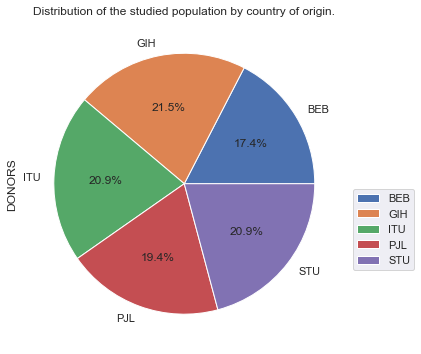

In [4]:
import seaborn as sns
# use Seaborn styles
sns.set()
df10 = df.drop(df.query('GENDER != "" | POPULATION == ""').index)  # remove rows where gender is not empty
df10.drop(['GENDER'], inplace=True, axis=1) # remove gender column
df10.pivot_table(df10, index=['POPULATION']).plot(
    kind='pie', 
    y='DONORS',
    figsize=(8, 6),
    autopct='%1.1f%%')
plt.title('Distribution of the studied population by country of origin.')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

It highlights a very similar distribution of donors across the available countries.

We can also analyze more in depth the distribution of donors, considering the gender too:

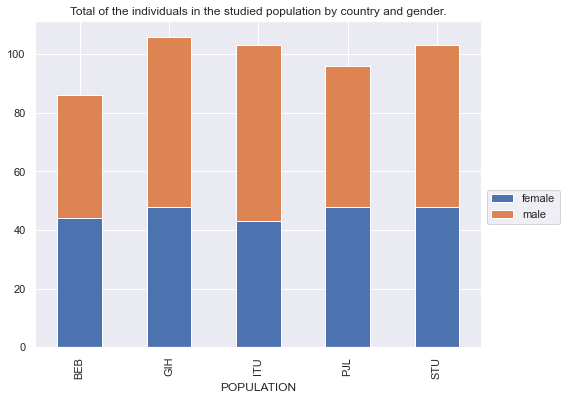

In [5]:
# prepare data frame
df2 = df.drop(df.query('GENDER == "" | POPULATION == "" ').index)    

df2_pivot = df2.pivot(index='POPULATION', columns='GENDER', values='DONORS') # creates a df with populations as index of rows, genders as columns, n° samples as cell values
df2_pivot.plot( # automatically uses the values of index as x-axis and stacks the values of columns
    kind='bar',
    stacked=True,
    figsize=(8, 6),
)
plt.title('Total of the individuals in the studied population by country and gender.')    
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

The plot shows that inside the SAS super-population, there is a substantially equal distribution of samples between males and females and between different countries. Open the notebook [donor_grouping_part_2](https://github.com/DEIB-GECO/VarSum/blob/master/demo/donor_grouping_part_2.ipynb) ( or the Colab version: [donor_grouping_part_2]https://colab.research.google.com/drive/1_g5TokSU60tkXVeB6sEtt9iA1Ky60yDm)) to observe an example of diversification inside this population.